In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cartopy.crs as ccrs

/home/m/m300883/miniconda3/envs/thirdPanel/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [13]:
import src.Teleconnection.pattern_statistic as ps
import src.plots.eof_plots as ept
import src.Teleconnection.spatial_pattern as sp
import src.plots.composite_plots as spcp

# the original Z1000 maps

In [3]:
# %%
allens = xr.open_dataset("/work/mh0033/m300883/transition/gr19/gphSeason/allens_season_time.nc")
#%% split ens
splitens = sp.split_ens(allens)

#%% demean ens-mean
demean = splitens-splitens.mean(dim = 'ens')

#%% select traposphere
trop = demean.sel(hlayers = slice(20000,100000))

In [4]:
Z1000 = trop.sel(hlayers = 100000).var156
datetimeindex = Z1000.indexes['time'].to_datetimeindex()
Z1000['time'] = datetimeindex

/tmp/ipykernel_253619/552027922.py:2: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  datetimeindex = Z1000.indexes['time'].to_datetimeindex()


In [17]:
smap = Z1000.isel(ens =0)

In [18]:
smap

<xarray.DataArray 'var156' (time: 149, lat: 32, lon: 70)>
array([[[  3.3893738 ,   2.5965042 ,   1.7254562 , ...,   0.79473114,
           1.3507538 ,   1.7386398 ],
        [  4.4284363 ,   3.4735794 ,   2.379219  , ...,   8.048653  ,
           8.8839035 ,   9.429947  ],
        [  4.981056  ,   4.183853  ,   3.3099365 , ...,  12.63607   ,
          13.750763  ,  14.554108  ],
        ...,
        [ 13.401932  ,  13.11792   ,  12.84642   , ...,  -5.8874817 ,
          -5.2389526 ,  -4.743927  ],
        [ 12.109726  ,  11.326477  ,  10.547272  , ...,  -6.77861   ,
          -6.2867737 ,  -5.3104095 ],
        [ 10.630432  ,   9.460892  ,   8.162857  , ...,  -7.305977  ,
          -6.8761215 ,  -5.643265  ]],

       [[-27.839249  , -28.214935  , -28.581299  , ..., -60.222137  ,
         -60.2722    , -60.198807  ],
        [-28.989029  , -29.471146  , -29.963692  , ..., -60.872208  ,
         -60.834877  , -60.60118   ],
        [-29.202827  , -29.974998  , -30.747398  , ..., -57.127655  ,
         -57.33697   , -57.313175  ],
...
        [ 21.038773  ,  20.871613  ,  20.989777  , ...,   1.4684906 ,
           2.1967163 ,   3.7730713 ],
        [ 19.100082  ,  18.70105   ,  18.535324  , ...,   1.0839691 ,
           1.1015625 ,   2.0727692 ],
        [ 17.400818  ,  16.797455  ,  16.331787  , ...,   1.0480194 ,
           0.8652725 ,   1.086441  ]],

       [[-36.43652   , -36.52878   , -36.748158  , ...,   1.1055489 ,
           1.2451782 ,   1.2147484 ],
        [-33.565784  , -33.54743   , -33.55364   , ...,   2.4299774 ,
           2.0778122 ,   1.4398232 ],
        [-31.480083  , -31.126232  , -30.737446  , ...,   1.9695473 ,
           1.1348991 ,   0.10491943],
        ...,
        [ -4.9299774 ,  -3.5554657 ,  -2.0904388 , ...,   2.9012604 ,
           1.8045349 ,   1.9094543 ],
        [ -5.2081757 ,  -3.8276062 ,  -2.4038239 , ...,   2.6409912 ,
           1.8944244 ,   0.8340149 ],
        [ -5.504242  ,  -3.979599  ,  -2.6933136 , ...,   2.1707153 ,
           1.8466263 ,   0.8444824 ]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1851-03-16T11:52:00 ... 1999-03-16T11:52:00
  * lon      (lon) float64 -90.0 -88.12 -86.25 -84.38 ... 33.75 35.62 37.5 39.38
  * lat      (lat) float64 79.27 77.41 75.54 73.68 ... 27.05 25.18 23.32 21.45
    ens      int64 0
    hlayers  float64 1e+05

In [19]:
proj = ccrs.Orthographic(central_longitude=-20, central_latitude=60)


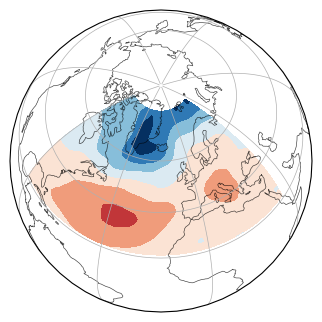

In [42]:
single_map = smap.isel(time=1).plot.contourf(
    transform = ccrs.PlateCarree(),
    subplot_kws=dict(projection=proj),
    levels = np.arange(-60,61,20),extend = 'both',
    add_colorbar = False
)
ax = single_map.axes
ax.set_title(None)
spcp.buildax(ax)
fig = single_map.axes.get_figure()
fig.set_dpi(100)
fig.set_figwidth(4)

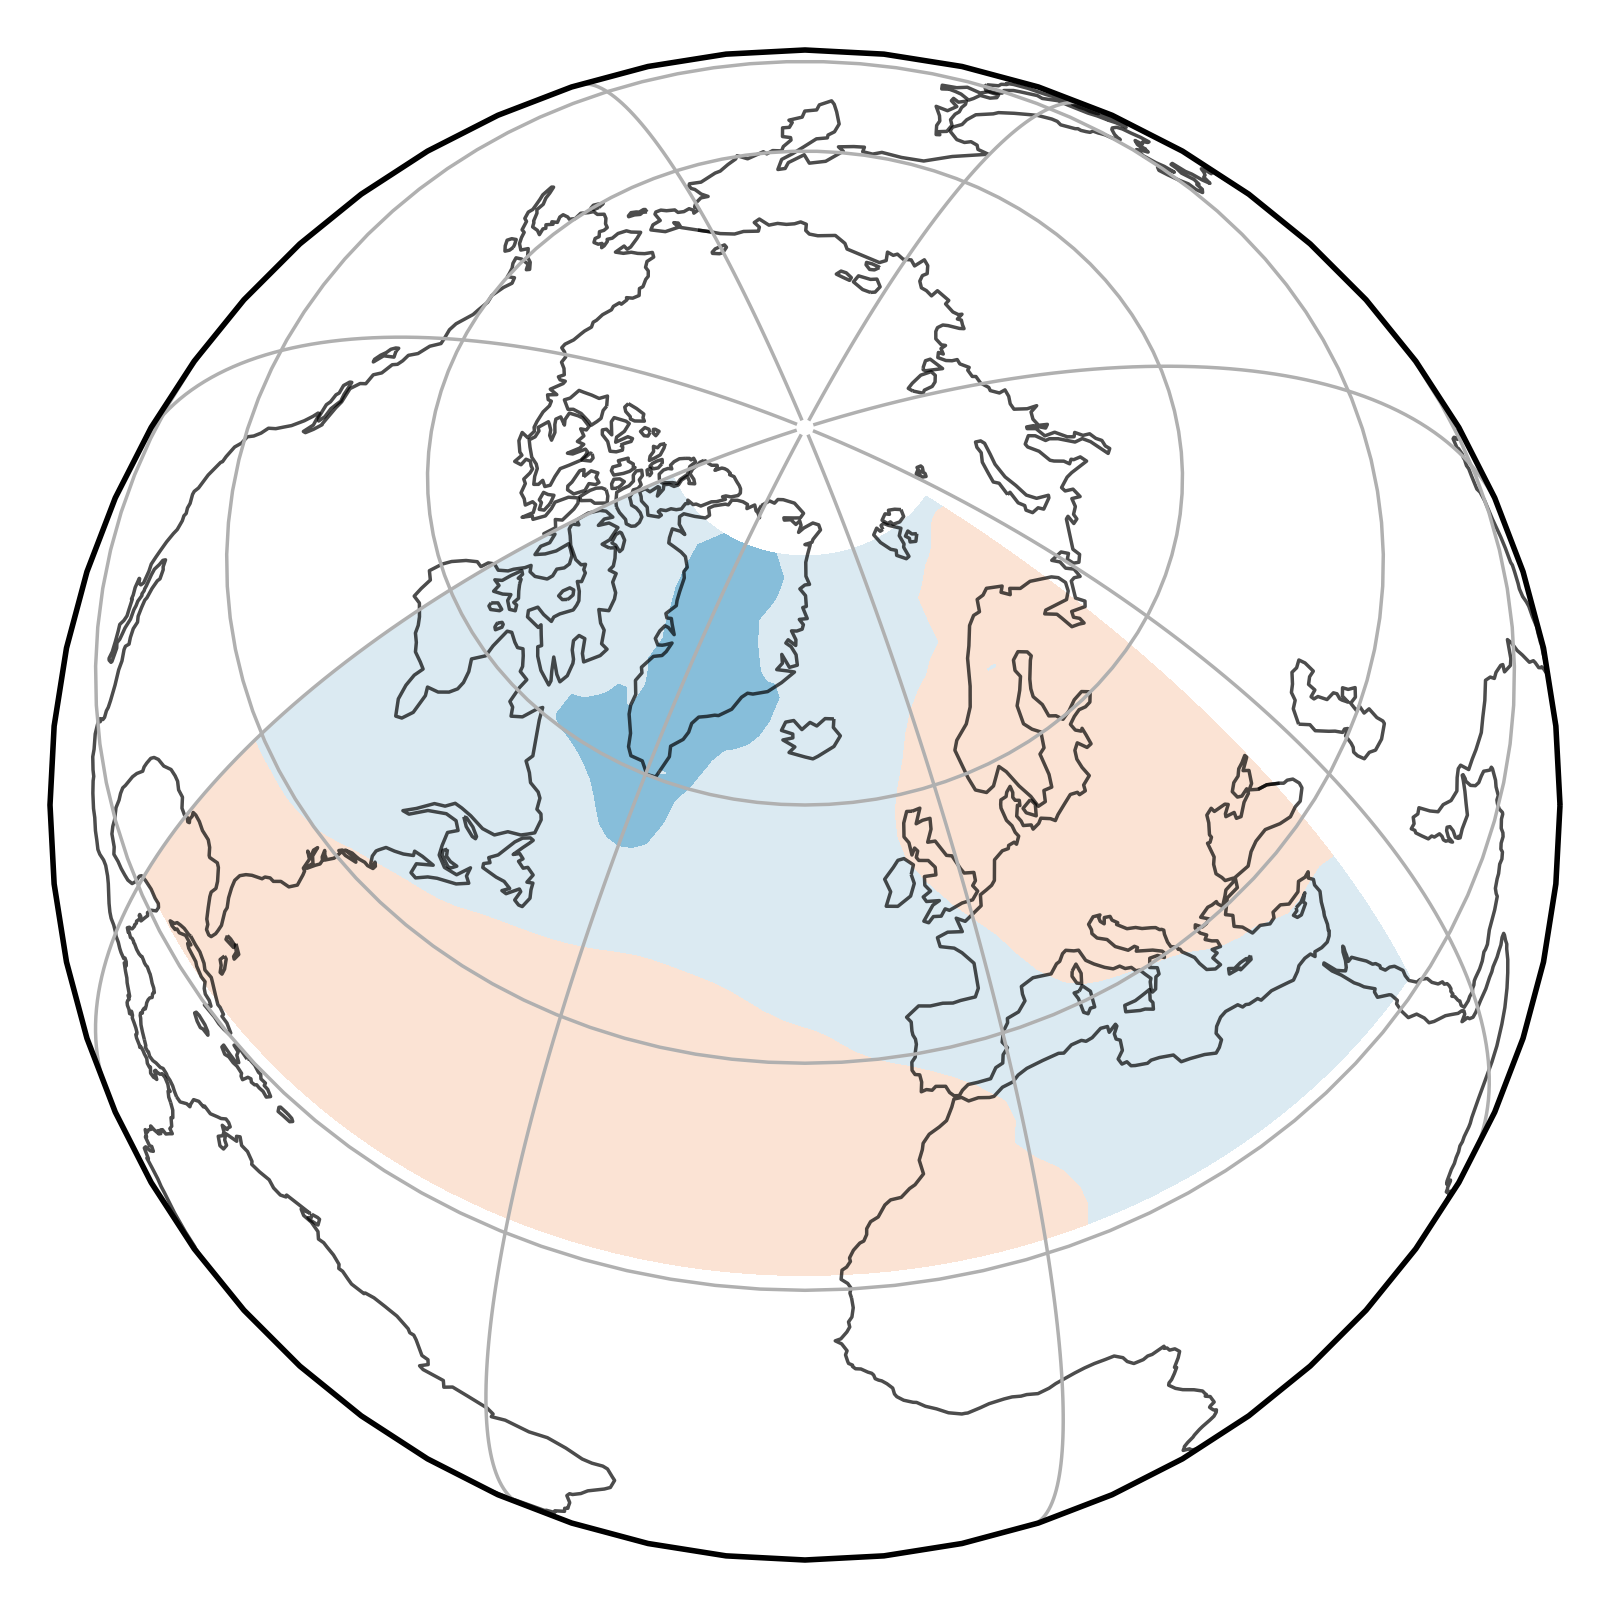

In [34]:
single_map = smap.isel(time=10).plot.contourf(
    transform = ccrs.PlateCarree(),
    subplot_kws=dict(projection=proj),
    levels = np.arange(-90,91,30),extend = 'both',
    add_colorbar = False

)
ax = single_map.axes
ax.set_title(None)
spcp.buildax(ax)
fig = single_map.axes.get_figure()
fig.set_dpi(500)

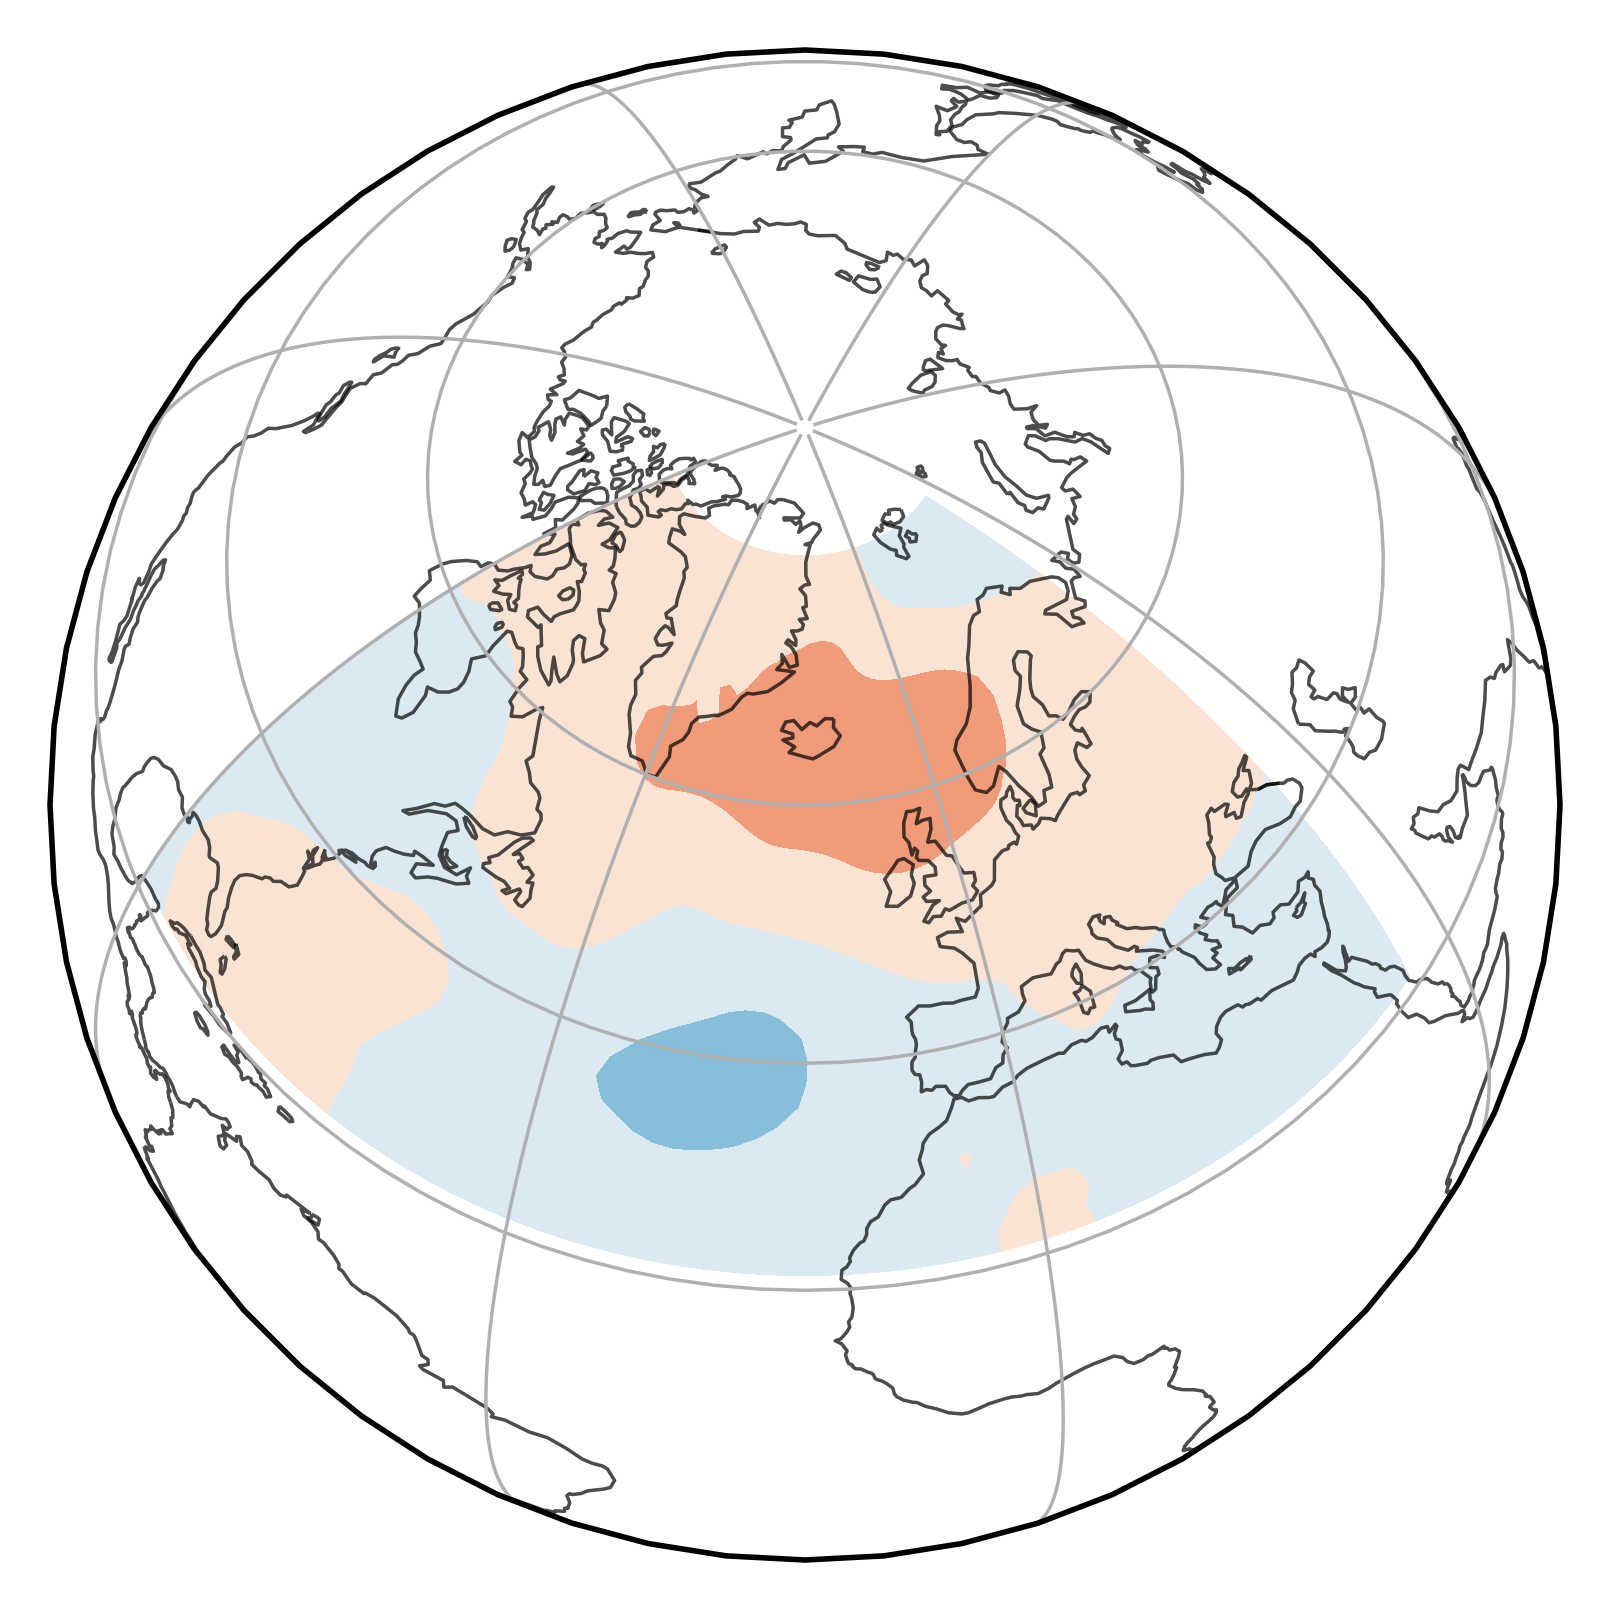

In [35]:
single_map = smap.isel(time=50).plot.contourf(
    transform = ccrs.PlateCarree(),
    subplot_kws=dict(projection=proj),
    levels = np.arange(-90,91,30),extend = 'both',
    add_colorbar = False

)
ax = single_map.axes
ax.set_title(None)
spcp.buildax(ax)
fig = single_map.axes.get_figure()
fig.set_dpi(500)

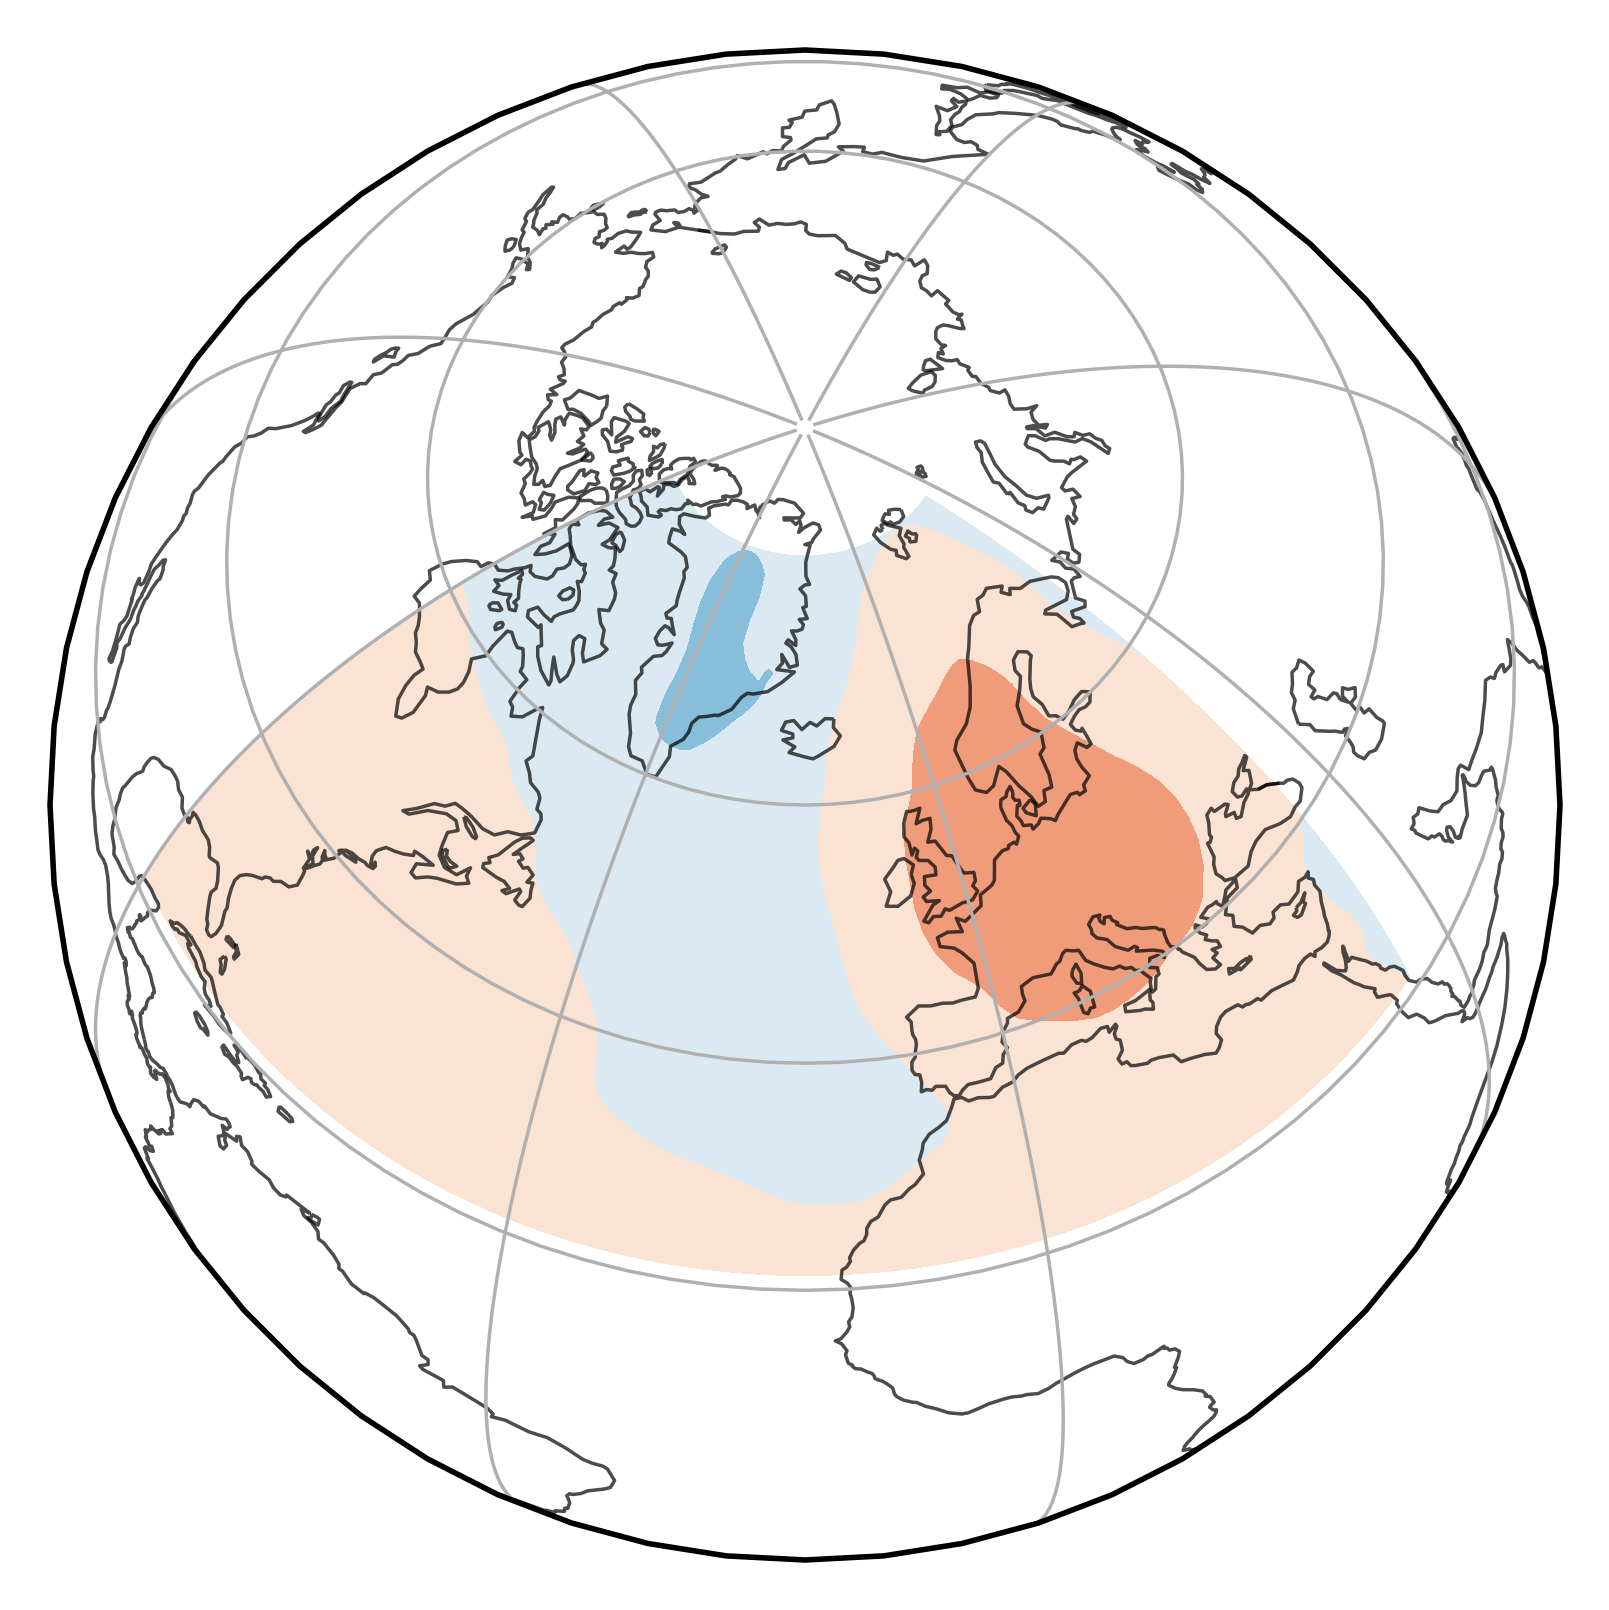

In [36]:
single_map = smap.isel(time=100).plot.contourf(
    transform = ccrs.PlateCarree(),
    subplot_kws=dict(projection=proj),
    levels = np.arange(-90,91,30),extend = 'both',
    add_colorbar = False

)
ax = single_map.axes
ax.set_title(None)
spcp.buildax(ax)
fig = single_map.axes.get_figure()
fig.set_dpi(500)